## TF-IDF

In [1]:
import os
os.environ['http_proxy'] = 'http://192.41.170.23:3128'
os.environ['https_proxy'] = 'http://192.41.170.23:3128'

In [2]:
import sys         
sys.path.append('/home/pranisaa/working_dir/Text-Summarization')
from config import *
import pandas as pd
from datasets import load_dataset
from dataset import Dataset
from transformers import T5Tokenizer, BartTokenizer
pd.set_option('display.max_colwidth', None)
import pickle

#### TEST TFIDF

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
text_tfidf = ['my name is beau', 'my name is fabby', 'i love deep learning']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True) #use_idf bool, default=True (to highlight by comparison) Enable inverse-document-frequency reweighting
x = tfidf_vectorizer.fit_transform(text_tfidf)
print(x.toarray().shape)
# print(tfidf_vectorizer.get_feature_names().shape)
#         tfidfcounts = pd.DataFrame(x.toarray(),index = tfidf_vectorizer.get_feature_names(), columns = ["tfidf"])
tfidfcounts = pd.DataFrame(x.toarray(),index = text_tfidf,  columns = tfidf_vectorizer.get_feature_names())
tfidfcounts

(3, 5)


/home/pranisaa/thesis/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,beau,deep,fabby,learning,love
my name is beau,1.0,0.00000,0.0,0.00000,0.00000
my name is fabby,0.0,0.00000,1.0,0.00000,0.00000
i love deep learning,0.0,0.57735,0.0,0.57735,0.57735


### Load dataset

In [4]:
# Load dataset
data = 'xsum'

if data == 'cnn_dailymail':
    dataset = load_dataset(data, '3.0.0')
    source_text = "article"
    target_text = "highlights"
elif data == "xsum":
    dataset = load_dataset(data)
    source_text = "document"
    target_text = "summary"
else:
    raise ValueError("Undefined dataset")

Using custom data configuration default
Reusing dataset xsum (/home/pranisaa/.cache/huggingface/datasets/xsum/default/1.2.0/32c23220eadddb1149b16ed2e9430a05293768cfffbdfd151058697d4c11f934)


  0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 204045
    })
    validation: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 11332
    })
    test: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 11334
    })
})

### Get dataset

In [6]:
pickle_in = open("val_len_q1_max512.pickle","rb")
example_dict = pickle.load(pickle_in)
q1_id = example_dict['ids']

pickle_in = open("val_len_q3_max512.pickle","rb")
example_dict = pickle.load(pickle_in)
q3_id = example_dict['ids']

In [7]:
df_data = {'id': dataset['validation']['id'], 'document': dataset['validation']['document']}

In [8]:
type(df_data['id'][0])
type(q1_id[0])

int

In [9]:
val_doc_q1 = {'ids': [], 'document': []}
for i, idx in enumerate(df_data['id']):
    if int(idx) in q1_id:
        val_doc_q1['ids'].append(idx)
        val_doc_q1['document'].append(df_data['document'][i])
        
val_doc_q3 = {'ids': [], 'document': []}
for i, idx in enumerate(df_data['id']):
    if int(idx) in q3_id:
        val_doc_q3['ids'].append(idx)
        val_doc_q3['document'].append(df_data['document'][i])

In [11]:
from gensim import corpora, models
from sklearn.decomposition import LatentDirichletAllocation
# from bs4 import BeautifulSoup
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [12]:
# val_doc_q1['document']

In [64]:
# Q1
def LDA(doc):
    tf_vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
    matrix = tf_vectorizer.fit_transform(doc)
    lda = LatentDirichletAllocation(n_components=1, learning_method='online', random_state=0, verbose=0, n_jobs = -1)
    lda_model = lda.fit(matrix)
    lda_matrix = lda_model.transform(matrix)
    return lda_model, lda_matrix, tf_vectorizer
# lda_matrix

def print_topics(model, tf_vectorizer, count_vectorizer, n_top_words):
    words = tf_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
      
        print("\nTopic #%d:" % topic_idx )
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [65]:
# val_doc_q1['document'][:3]

In [66]:
# val_doc_q3['document'][:5]

In [67]:
lda_model_q1 ,lda_matrix_q1, tf_vectorizer_q1 = LDA(val_doc_q1['document'])
lda_model_q3, lda_matrix_q3, tf_vectorizer_q3 = LDA(val_doc_q3['document'])

In [68]:
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda_model_q1, tf_vectorizer_q1, lda_matrix_q1, 50)

Topics found via LDA:

Topic #0:
said year mr people old just points told police city time work place club school water media court new ms shares added hampshire season going staff west closed day years rose ve bank head 20 30 week final council best hit hours 15 later scotland near play london film make


In [69]:
print("Topics found via LDA:")
print_topics(lda_model_q3, tf_vectorizer_q3, lda_matrix_q3, 50)

Topics found via LDA:

Topic #0:
said police year mr people time club man new season court league years bbc team old called added scotland told family local road park city special public won world incident died wales government 30 building area hospital 23 uk report national help 000 death day sunday future king christmas news


In [52]:
# print_topics(lda_model, gps_news_matrix, 15)

In [55]:
from sklearn.manifold import TSNE
import seaborn as sns
plt.figure(figsize=(15, 10))
def plot_TSNE(lda_matrix):
#     plt.figure(figsize=(15, 10))
    model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                            n_iter=1000, verbose=1, random_state=0, angle=0.75)
    tsne_features = model.fit_transform(lda_matrix)
    df = pd.DataFrame(tsne_features)
    df['topic'] = lda_matrix.argmax(axis=1)
    df.columns = ['TSNE1', 'TSNE2', 'topic']
    plt.title('T-SNE plot of different headlines ( headlines are clustered among their topics)')
    ax = sns.scatterplot(x = 'TSNE1', y = 'TSNE2', hue = 'topic', data = df, legend = 'full')

<Figure size 1080x720 with 0 Axes>

/home/pranisaa/thesis/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 37.785118
[t-SNE] KL divergence after 400 iterations: 0.000002


/home/pranisaa/thesis/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 101 nearest neighbors...
[t-SNE] Indexed 102 samples in 0.000s...
[t-SNE] Computed neighbors for 102 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 102 / 102
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 38.125675
[t-SNE] KL divergence after 450 iterations: 0.000001


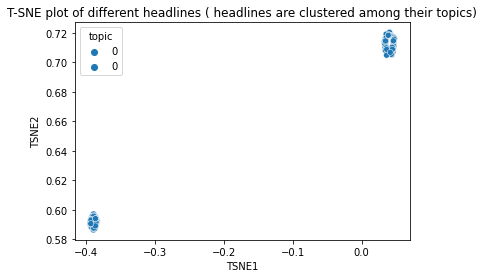

In [56]:
plot_TSNE(lda_matrix_q1)
plot_TSNE(lda_matrix_q3)

In [71]:
import nltk

nltk.download('stopwords') # run this one time

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/pranisaa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True